<a href="https://colab.research.google.com/github/IagoMagalhaes23/IoT-Project/blob/main/Analise_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/olist_order_reviews_dataset.csv')

In [ ]:
data.head(15)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [ ]:
data.drop('order_id', axis=1, inplace = True)
data.drop( 'review_answer_timestamp', axis=1, inplace = True)
data.drop( 'review_creation_date', axis=1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   review_score            99224 non-null  int64 
 2   review_comment_title    11568 non-null  object
 3   review_comment_message  40977 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
duplicados = round(sum(data.duplicated('review_id'))/len(data)*100, 2)
print(f'Reviews com id duplicado: {duplicados}%.')

Reviews com id duplicado: 0.82%.


In [ ]:
data.drop_duplicates('review_id', inplace=True)

In [ ]:
data.fillna('', inplace = True) # para nao ter problemas com nulos na concatenacao

# concatenando as duas colunas
data['review'] = data['review_comment_title'] + ' ' + data['review_comment_message']

# removendo entradas sem texto
data = data[data['review'] != ' ']

In [ ]:
labels = []

for score in data['review_score']:
  if score > 3:
    labels.append(1)
  else:
    labels.append(0)

data['label'] = labels # cria coluna com as labels (0 ou 1)

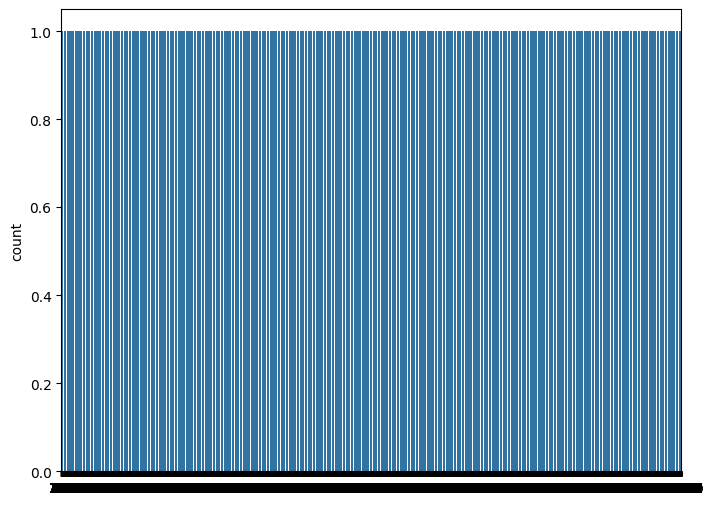

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data['label'])
plt.show()

In [ ]:
import nltk

# importando a lista da nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_pt = stopwords.words("portuguese")

# remove 'nao' e 'nem' da lista
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!spacy download pt_core_news_sm

import spacy.cli
spacy.cli.download('pt_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pt_core_news_sm

spc_pt = pt_core_news_sm.load()

In [ ]:
def limpa_texto(texto):
  '''(str) -> str
  Essa funcao recebe uma string, deixa tudo em minusculo, filtra apenas letras,
  retira stopwords, lemmatiza e retorna a string resultante.
  '''
  texto = texto.lower()

  texto = re.sub(r"[\W\d_]+", " ", texto)

  texto = [pal for pal in texto.split() if pal not in stopwords_pt]

  spc_texto = spc_pt(" ".join(texto))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]

  return " ".join(tokens)

# Aplica a funcao nas reviews do dataset
data['review'] = data['review'].apply(limpa_texto)

In [ ]:
data = data[data['review'] != '']

In [ ]:
# Importando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instanciando o CountVectorizer, binary=True faz a codificacao binaria
vectorizer = CountVectorizer(binary=True, max_features=5000)

texto = data['review']

# Vetorizando o texto
X_bow = vectorizer.fit_transform(texto)

In [ ]:
# Importando o TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000)

# Vetorizando
X_tfidf = tfidf_vect.fit_transform(texto)

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X_bow, data['label'],
                                                        test_size=0.3, random_state = 10)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_tfidf, data['label'],
                                                        test_size=0.3, random_state = 10)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
  principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

In [ ]:
# Importando a regressao logistica da sklearn
from sklearn.linear_model import LogisticRegression

# Instanciando a reg. logistica
reglog = LogisticRegression()

# Aplicando o modelo
reglog.fit(X1_train, y1_train)

# Predicao
y1_reglog_pred = reglog.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia:  0.8931086320120263

AUROC: 0.8767235364243556

F1-Score: 0.892546177768727

Matriz de confusão:


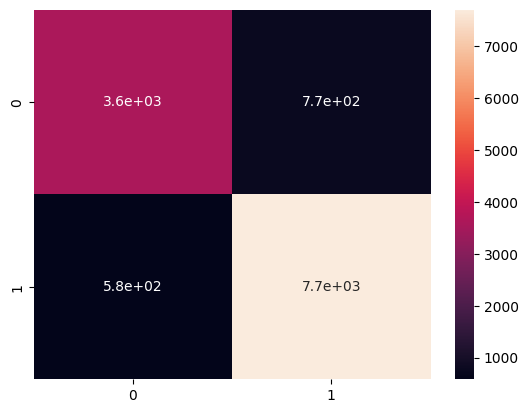

In [ ]:
mostra_metricas(y1_test, y1_reglog_pred)

In [ ]:

# Instanciando a reg. logistica
reglog2 = LogisticRegression()

# Aplicando o modelo
reglog2.fit(X2_train, y2_train)

# Predicao
y1_reglog_pred2 = reglog2.predict(X2_test)

In [ ]:
def nova_predicao(texto):
  '''Funcao que recebe uma string e printa a predicao feita
  pelo modelo reglog2.'''
  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog2.predict(texto_vetorizado)

  if pred == 0:
    print("review negativa.")
  else:
    print("review positiva.")

In [ ]:
nova_predicao('Lindo')

review positiva.


In [ ]:
!pip install joblib
import joblib

joblib.dump(reglog2, 'nlp.pkl')

['nlp.pkl']

#Referências
- [Tutorial](https://medium.com/turing-talks/sua-primeira-an%C3%A1lise-de-sentimentos-com-scikit-learn-a47c088ea7bd)